<a href="https://colab.research.google.com/github/rachioko/Neural-Networks-with-Tensorflow/blob/master/Neural_Network_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words = 10000)

Using TensorFlow backend.


17465344/17464789 [==============================] - 0s 0us/step


In [2]:
#check training data and label
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [3]:
#check that the dataset only contains max 10000 words
max([max(sequence) for sequence in train_data])

9999

In [4]:
#create word index
word_index = imdb.get_word_index()

reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

#get review values and change them into words
review_words = ''.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [5]:
review_words

"?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall"

In [0]:
#one-hot encode data (change into np vectors)

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))
  
  for i, sequence in enumerate(sequences):
    result[i,sequence] = 1
  
  return result

In [7]:
#vectorize the training and test sets
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

#vectorize the labels as floats
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


[0. 1. 1. ... 0. 0. 0.]


In [8]:
#Define model and our Neural Network structure : 1 hidden layer
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop' , loss ='binary_crossentropy' , metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
#Test our Model
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 400us/step - loss: 0.5264 - acc: 0.7711 - val_loss: 0.3892 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 1s 93us/step - loss: 0.3112 - acc: 0.8995 - val_loss: 0.3152 - val_acc: 0.8800
Epoch 3/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.2256 - acc: 0.9268 - val_loss: 0.2878 - val_acc: 0.8842
Epoch 4/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.1776 - acc: 0.9409 - val_loss: 0.2745 - val_acc: 0.8907
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1405 - acc: 0.9556 - val_loss: 0.3054 - val_acc: 0.8774
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1148 - acc: 0.9660 - val_loss: 0.3150 - val_acc: 0.8789
Epoch 7/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.0942 - acc: 0.9722 - val_loss: 0.3111 - val_a

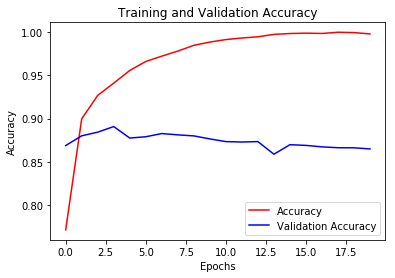

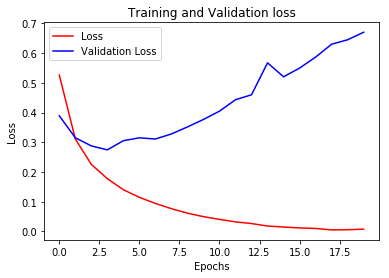

<Figure size 432x288 with 0 Axes>

In [10]:
#plot the accuracy against the loss
import matplotlib.pyplot as plt

#Retrieve a list of list results on training and test data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) #get number of epochs

#plot training and validation accuracy per epoch
plt.plot(epochs, acc,'r')
plt.plot(epochs, val_acc,'b')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure();

#plot training and validation loss per epoch
plt.plot(epochs, loss,'r')
plt.plot(epochs, val_loss,'b')
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure();

In [11]:
#Evaluate the Model accuracy on test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test Accuracy:" , test_acc)

25000/25000 [==============================] - 2s 99us/step
Test Accuracy: 0.85004


Test Accuracy is slightly below the Training accuracy meaning we might have some overfitting. So we are going to try a new model but this time on less epochs(5).


In [15]:
model = models.Sequential()
model.add(layers.Dense(16,activation ='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop' , loss ='binary_crossentropy' , metrics = ['accuracy'])

history = model.fit(partial_x_train, partial_y_train,
                   epochs = 5,
                   batch_size = 512,
                   validation_data = (x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 2s 105us/step - loss: 0.5801 - acc: 0.7143 - val_loss: 0.4617 - val_acc: 0.8531
Epoch 2/5
15000/15000 [==============================] - 1s 93us/step - loss: 0.3745 - acc: 0.8945 - val_loss: 0.3437 - val_acc: 0.8861
Epoch 3/5
15000/15000 [==============================] - 1s 93us/step - loss: 0.2582 - acc: 0.9245 - val_loss: 0.2963 - val_acc: 0.8893
Epoch 4/5
15000/15000 [==============================] - 1s 92us/step - loss: 0.1964 - acc: 0.9433 - val_loss: 0.2914 - val_acc: 0.8854
Epoch 5/5
15000/15000 [==============================] - 1s 92us/step - loss: 0.1577 - acc: 0.9514 - val_loss: 0.2825 - val_acc: 0.8860


In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test Accuracy:" , test_acc)


Train Accurary [0.7710666669209798, 0.8995333330790202, 0.9267999998728434, 0.9409333333015442, 0.955599999777476, 0.966000000222524, 0.9721999999682108, 0.9780666664759318, 0.9847333334922791, 0.9884666669209798, 0.9913999999046326, 0.9932, 0.9946, 0.9974000000635783, 0.9984, 0.9988, 0.9984666666666666, 0.9998666666666667, 0.9994666666666666, 0.9979333333333333]
25000/25000 [==============================] - 2s 97us/step
Test Accuracy: 0.8782


Might be by little but it is still Better. ':D 

In [17]:
#make prediction
prediction = model.predict(x_test)

prediction[0]

array([0.16512972], dtype=float32)